### 1.1 Loading libraries

In [1]:
import scipy.misc
import random
import numpy as np
import scipy

### 1.2 Load data

In [4]:
xs = []
ys = []

#read data.txt
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.7)]
train_ys = ys[:int(len(xs) * 0.7)]

val_xs = xs[-int(len(xs) * 0.3):]
val_ys = ys[-int(len(xs) * 0.3):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)


In [5]:
# scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0
# you can break the whole line into parts like this
# here (train_batch_pointer + i) % num_train_images => "% num_train_images" is used to make sure that the
# (train_batch_pointer + i) values should not cross number of train images.

# lets explain whats happening with the first images
image_read = scipy.misc.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
resized_image = scipy.misc.imresize(image_read, [66, 200])
print("After resizing the images into 66*200, ",resized_image.shape)
# 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it

C:\Users\MANAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


C:\Users\MANAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


In [6]:
scipy.misc.imresize(scipy.misc.imread(train_xs[0])[-150:], [66, 200])

C:\Users\MANAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\MANAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


array([[[180, 162, 166],
        [176, 172, 173],
        [176, 176, 171],
        ...,
        [ 90,  88, 113],
        [106,  93,  99],
        [101, 103,  81]],

       [[191, 188, 192],
        [186, 193, 204],
        [187, 196, 200],
        ...,
        [ 84,  82,  97],
        [ 86,  88,  79],
        [ 86, 101,  74]],

       [[208, 201, 223],
        [199, 212, 230],
        [201, 212, 226],
        ...,
        [128, 124, 115],
        [128, 126, 117],
        [132, 126, 119]],

       ...,

       [[ 54,  43,  55],
        [ 59,  43,  56],
        [ 55,  41,  53],
        ...,
        [ 23,  24,  25],
        [ 24,  25,  27],
        [ 25,  26,  29]],

       [[ 56,  36,  58],
        [ 53,  35,  63],
        [ 51,  39,  54],
        ...,
        [ 23,  25,  22],
        [ 23,  26,  23],
        [ 24,  27,  25]],

       [[ 68,  37,  44],
        [ 53,  41,  49],
        [ 49,  49,  37],
        ...,
        [ 28,  25,  26],
        [ 26,  23,  25],
        [ 24,  22,  24]]

### 1.3 EDA

In [7]:
print("Approx %d minutes of total data"%int(num_images/(30*60)))
print("Approx %d minutes of train data"%int(num_train_images/(30*60)))
print("Approx %d minutes of test data"%int(num_val_images/(30*60)))

Approx 25 minutes of total data
Approx 17 minutes of train data
Approx 7 minutes of test data


#### 1.3.1 Histogram

In [8]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.7
LIMIT = None
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in islice(fp, LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.7)

train_y = y[:split_index]
test_y = y[split_index:]

          

Completed processing data.txt


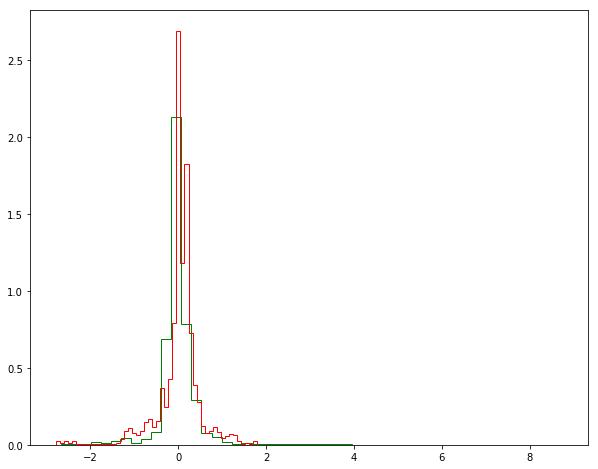

In [10]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()

### 1.4 Baseline Models

In [11]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.241561
Test_MSE(ZERO):0.241107


### 1.5  NN model

In [12]:
#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0


def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [13]:
import tensorflow as tf
import scipy

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.identity(tf.matmul(h_fc4_drop, W_fc5) + b_fc5) #scale the atan output


C:\Users\MANAS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
import os
import tensorflow as tf
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model
from datetime import datetime


start = datetime.now()

LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
    epoch_time = datetime.now()
    for i in range(int(driving_data.num_images/batch_size)):
        xs, ys = driving_data.LoadTrainBatch(batch_size)
        train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.5})
        if i % 10 == 0:
            xs, ys = driving_data.LoadValBatch(batch_size)
            loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
            prev_i = i
            prev_loss = loss_value
            #print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

        # write logs at every iteration
        summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
        summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

        if i % batch_size == 0:
            if not os.path.exists(LOGDIR):
                os.makedirs(LOGDIR)
            checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
            filename = saver.save(sess, checkpoint_path)
    print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))
    print("\nTime taken to run this epoch: ")
    print(datetime.now() - epoch_time)
    print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

print("\nTime taken to train the model: ")
print(datetime.now() - start)
sess.close()


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0, Step: 453, Loss: 7.48924

Time taken to run this epoch: 
0:23:51.607658
Model saved in file: ./save\model.ckpt
Epoch: 1, Step: 553, Loss: 5.30815

Time taken to run this epoch: 
0:21:51.695996
Model saved in file: ./save\model.ckpt
Epoch: 2, Step: 653, Loss: 3.66844

Time taken to run this epoch: 
0:21:48.726161
Model saved in file: ./save\model.ckpt


Epoch: 3, Step: 753, Loss: 3.30409

Time taken to run this epoch: 
0:21:41.159856
Model saved in file: ./save\model.ckpt
Epoch: 4, Step: 853, Loss: 2.3578

Time taken to run this epoch: 
0:22:20.380329
Model saved in file: ./save\model.ckpt
Epoch: 5, Step: 953, Loss: 2.07392

Time taken to run this epoch: 
0:21:48.589752
Model saved in file: ./save\model.ckpt
Epoch: 6, Step: 1053, Loss: 1.66325

Time taken to run this epoch: 
0:21:42.741590
Model saved in file: ./save\model.ckpt


Epoch: 7, Step: 1153, Loss: 1.39157

Time taken to run this epoch: 
0:21:42.272077
Model saved in file: ./save\model.ckpt
Epoch: 8, Step: 1253, Loss: 1.18594

Time taken to run this epoch: 
0:22:05.905447
Model saved in file: ./save\model.ckpt
Epoch: 9, Step: 1353, Loss: 0.978694

Time taken to run this epoch: 
0:21:44.152272
Model saved in file: ./save\model.ckpt
Epoch: 10, Step: 1453, Loss: 0.853241

Time taken to run this epoch: 
0:21:44.779443
Model saved in file: ./save\model.ckpt


Epoch: 11, Step: 1553, Loss: 0.758362

Time taken to run this epoch: 
0:21:51.981051
Model saved in file: ./save\model.ckpt
Epoch: 12, Step: 1653, Loss: 0.56339

Time taken to run this epoch: 
0:22:01.546418
Model saved in file: ./save\model.ckpt
Epoch: 13, Step: 1753, Loss: 1.33913

Time taken to run this epoch: 
0:21:45.594534
Model saved in file: ./save\model.ckpt
Epoch: 14, Step: 1853, Loss: 0.451892

Time taken to run this epoch: 
0:21:40.454394
Model saved in file: ./save\model.ckpt


Epoch: 15, Step: 1953, Loss: 0.443786

Time taken to run this epoch: 
0:21:52.186087
Model saved in file: ./save\model.ckpt
Epoch: 16, Step: 2053, Loss: 0.301004

Time taken to run this epoch: 
0:22:24.681654
Model saved in file: ./save\model.ckpt
Epoch: 17, Step: 2153, Loss: 0.381361

Time taken to run this epoch: 
0:21:47.739879
Model saved in file: ./save\model.ckpt


Epoch: 18, Step: 2253, Loss: 0.242415

Time taken to run this epoch: 
0:21:47.396913
Model saved in file: ./save\model.ckpt
Epoch: 19, Step: 2353, Loss: 0.251511

Time taken to run this epoch: 
0:21:45.719430
Model saved in file: ./save\model.ckpt
Epoch: 20, Step: 2453, Loss: 0.263722

Time taken to run this epoch: 
0:26:52.670497
Model saved in file: ./save\model.ckpt
Epoch: 21, Step: 2553, Loss: 0.204585

Time taken to run this epoch: 
0:21:55.632220
Model saved in file: ./save\model.ckpt


Epoch: 22, Step: 2653, Loss: 0.996501

Time taken to run this epoch: 
0:21:47.970621
Model saved in file: ./save\model.ckpt
Epoch: 23, Step: 2753, Loss: 0.187667

Time taken to run this epoch: 
0:21:41.527863
Model saved in file: ./save\model.ckpt
Epoch: 24, Step: 2853, Loss: 3.49263

Time taken to run this epoch: 
0:22:28.323071
Model saved in file: ./save\model.ckpt
Epoch: 25, Step: 2953, Loss: 0.185885

Time taken to run this epoch: 
0:22:35.164452
Model saved in file: ./save\model.ckpt


Epoch: 26, Step: 3053, Loss: 0.17982

Time taken to run this epoch: 
0:21:43.477051
Model saved in file: ./save\model.ckpt
Epoch: 27, Step: 3153, Loss: 0.211559

Time taken to run this epoch: 
0:21:49.114975
Model saved in file: ./save\model.ckpt
Epoch: 28, Step: 3253, Loss: 0.171786

Time taken to run this epoch: 
0:22:11.621156
Model saved in file: ./save\model.ckpt
Epoch: 29, Step: 3353, Loss: 0.157499

Time taken to run this epoch: 
0:23:46.043647
Model saved in file: ./save\model.ckpt
Run the command line:
--> tensorboard --logdir=./logs 
Then open http://0.0.0.0:6006/ into your web browser

Time taken to train the model: 
11:06:16.355784


* To run this model run run_dataset.py in command prompt.